In [1]:
from pandas import read_csv
from matplotlib import pyplot as plt
#dataseti çağırdık ve kullanmayacağımız satırları sildik
series = read_csv('GlobalTemperatures.csv', header=0, index_col=0)
series = series.iloc[120:]
series = series.drop(['LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],axis = 1)
#dataset grafiği oluşturduk
series.plot()
plt.show()
len(series)

<Figure size 640x480 with 1 Axes>

3072

In [2]:
from pandas import read_csv
#verimizi test ve train olarak ikiye ayırdık -test için 50 veri-
split_point = len(series) - 50
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
#dataset.to_csv('dataset.csv', index=False)
validation.round(3)
dataset.to_csv('dataset.csv', index=False)
validation.to_csv('validation.csv', index=False)

Dataset 3022, Validation 50


In [3]:
#Sıcaklık verileri sezonsaldır ve sezonsal veriler ARIMA'da işlemek için uygun değildir. 
#Bu yüzden verilerimizi sabitleştirmek için aşağıdaki fonksiyonu kullanıyoruz.
#Fonksiyon datasetimizdeki her bir veriyi kendisinden önceki veriden çıkarıyor ve aralarındaki farklar
#üzerinden işlem yapıyoruz.
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    
    print(diff)
    return numpy.array(diff)

In [6]:
#çıkarma işlemini tersine çevirme fonksiyonu
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [7]:
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return np.array(diff)

series = read_csv('dataset.csv', header=None)
#X değişkeni tahmin edilecek veriler
X = series.values
X = X[1:]
X = X.astype(np.float)
days_in_year = 365
differenced = difference(X, days_in_year)
#verilerimizi modele oturtuyoruz
model = ARIMA(differenced, order=(7,0,7))
model_fit = model.fit(disp=0)

C:\Users\Onur\Anaconda3\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Onur\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [10]:
#tekli tahmin
forecast = model_fit.forecast()[0]
forecast

array([-6.79431701])

In [11]:
#tahmin değeri üzerinde çıkarma fonksiyonu uygulamıştık. Şimdi gerçek tahmin değerini almak için aynı işlemin tersini yapan fonksiyonu uyguluyoruz.
forecast = inverse_difference(X, forecast, days_in_year)

In [12]:
print('Forecast: %f' % forecast)

Forecast: 6.970683


In [13]:
#çoklu tahmin
forecast = model_fit.forecast(steps=50)[0]
forecast

array([ -6.79431701, -10.15102474, -10.58346181,  -8.05590972,
        -3.23903604,   2.55678545,   7.77849217,  11.03846917,
        11.45545938,   8.90572997,   4.08722123,  -1.71318907,
        -6.95349472, -10.2232946 , -10.64029651,  -8.10819645,
        -3.30244673,   2.49711176,   7.72739499,  10.98129241,
        11.39835204,   8.86082057,   4.04060205,  -1.76359357,
        -6.99509719, -10.263745  , -10.68912801,  -8.15293737,
        -3.34351902,   2.44890192,   7.68033723,  10.94245291,
        11.35673995,   8.81884004,   4.00740626,  -1.7963567 ,
        -7.03226717, -10.29583654, -10.72009814,  -8.19051885,
        -3.37986034,   2.41650433,   7.64366564,  10.90640314,
        11.32764142,   8.78957714,   3.97714227,  -1.82051799,
        -7.05567862, -10.32349392])

In [14]:
#çoklu tahmin çıktısı
import pandas as pd
history = [x for x in X]
month = 1
predicted = np.array([])
validate = pd.read_csv(r"validation.csv")
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    predicted = np.append(predicted,inverted)
    print('Month %d: %f' % (month, inverted))
    history.append(inverted)
    month += 1

Month 1: 6.970683
Month 2: 4.586975
Month 3: 3.918538
Month 4: 4.180090
Month 5: 6.154964
Month 6: 8.829785
Month 7: 12.297492
Month 8: 13.596469
Month 9: 14.736459
Month 10: 13.778730
Month 11: 12.552221
Month 12: 9.634811
Month 13: 6.291505
Month 14: 4.321705
Month 15: 3.155703
Month 16: 3.930804
Month 17: 5.929553
Month 18: 8.458112
Month 19: 12.054395
Month 20: 14.426292
Month 21: 15.212352
Month 22: 14.559821
Month 23: 12.733602
Month 24: 9.965406
Month 25: 6.482903
Month 26: 4.144255
Month 27: 3.612872
Month 28: 4.545063
Month 29: 6.134481
Month 30: 9.213902
Month 31: 11.509337
Month 32: 13.883453
Month 33: 14.449740
Month 34: 14.489840
Month 35: 12.439406
Month 36: 10.179643
Month 37: 6.354733
Month 38: 4.133163
Month 39: 3.263902
Month 40: 3.824481
Month 41: 5.998140
Month 42: 8.227504
Month 43: 10.828666
Month 44: 13.916403
Month 45: 14.031641
Month 46: 14.240577
Month 47: 12.610142
Month 48: 9.605482
Month 49: 6.513321
Month 50: 3.649506


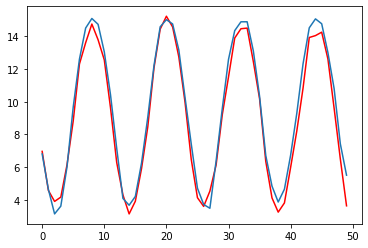

In [15]:
#gerçek değerlerle tahmin değerlerinin kıyaslanması
import matplotlib.pyplot as plt
import pandas as pd
validate = pd.read_csv(r"validation.csv")
val = validate.values
plt.plot(predicted,color="red")
plt.plot(validate)


In [16]:
###### verilerin dışarı aktarılması #######

In [17]:
predicted = np.round_(predicted, decimals = 2)
predicted

array([ 6.97,  4.59,  3.92,  4.18,  6.15,  8.83, 12.3 , 13.6 , 14.74,
       13.78, 12.55,  9.63,  6.29,  4.32,  3.16,  3.93,  5.93,  8.46,
       12.05, 14.43, 15.21, 14.56, 12.73,  9.97,  6.48,  4.14,  3.61,
        4.55,  6.13,  9.21, 11.51, 13.88, 14.45, 14.49, 12.44, 10.18,
        6.35,  4.13,  3.26,  3.82,  6.  ,  8.23, 10.83, 13.92, 14.03,
       14.24, 12.61,  9.61,  6.51,  3.65])

In [18]:
series1 = read_csv('GlobalTemperatures.csv', header=0)

In [19]:
series1 = series1.drop(['LandAverageTemperature','LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],axis = 1)

In [20]:
series1 = series1.iloc[-50:]
series1

,dt
3142,2011-11-01
3143,2011-12-01
3144,2012-01-01
3145,2012-02-01
3146,2012-03-01
3147,2012-04-01
3148,2012-05-01
3149,2012-06-01
3150,2012-07-01
3151,2012-08-01


In [21]:
series1.index = pd.RangeIndex(len(series1.index))

series1.index = range(len(series1.index))
validation.index = pd.RangeIndex(len(validation.index))

validation.index = range(len(validation.index))

In [22]:
series1["realValue"] = validation["LandAverageTemperature"]

In [23]:
series1

,dt,realValue
0,2011-11-01,6.814
1,2011-12-01,4.655
2,2012-01-01,3.157
3,2012-02-01,3.628
4,2012-03-01,6.023
5,2012-04-01,9.676
6,2012-05-01,12.590
7,2012-06-01,14.492
8,2012-07-01,15.076
9,2012-08-01,14.720


In [24]:
series1["predicted"] = predicted

In [25]:
series1.to_csv(r'result.csv')

In [26]:
forecast2 = model_fit.forecast(steps=110)[0]

In [27]:
import pandas as pd
history = [x for x in X]
month = 1
predicted = np.array([])
validate = pd.read_csv(r"validation.csv")
for yhat in forecast2:
    inverted = inverse_difference(history, yhat, days_in_year)
    predicted = np.append(predicted,inverted)
    print('Month %d: %f' % (month, inverted))
    history.append(inverted)
    month += 1

Month 1: 6.970683
Month 2: 4.586975
Month 3: 3.918538
Month 4: 4.180090
Month 5: 6.154964
Month 6: 8.829785
Month 7: 12.297492
Month 8: 13.596469
Month 9: 14.736459
Month 10: 13.778730
Month 11: 12.552221
Month 12: 9.634811
Month 13: 6.291505
Month 14: 4.321705
Month 15: 3.155703
Month 16: 3.930804
Month 17: 5.929553
Month 18: 8.458112
Month 19: 12.054395
Month 20: 14.426292
Month 21: 15.212352
Month 22: 14.559821
Month 23: 12.733602
Month 24: 9.965406
Month 25: 6.482903
Month 26: 4.144255
Month 27: 3.612872
Month 28: 4.545063
Month 29: 6.134481
Month 30: 9.213902
Month 31: 11.509337
Month 32: 13.883453
Month 33: 14.449740
Month 34: 14.489840
Month 35: 12.439406
Month 36: 10.179643
Month 37: 6.354733
Month 38: 4.133163
Month 39: 3.263902
Month 40: 3.824481
Month 41: 5.998140
Month 42: 8.227504
Month 43: 10.828666
Month 44: 13.916403
Month 45: 14.031641
Month 46: 14.240577
Month 47: 12.610142
Month 48: 9.605482
Month 49: 6.513321
Month 50: 3.649506
Month 51: 3.313214
Month 52: 3.764961


In [28]:
series2 = pd.DataFrame([])

In [29]:
series2["PredictedValue"] = np.around(predicted, decimals=2)

In [30]:
series2

,PredictedValue
0,6.97
1,4.59
2,3.92
3,4.18
4,6.15
...,...
105,15.45
106,13.09
107,9.95
108,6.78


In [31]:
dates = np.array(["2011-12"])

In [32]:
year = 2012
month = 1

In [33]:
while year<=2020:
    parse_dates = str(year)+"-"+str(month)
    dates = np.append(dates,parse_dates)
    if month >=12:
        month = 1
        year+= 1
    else:
        month+=1


In [34]:
dates

array(['2011-12', '2012-1', '2012-2', '2012-3', '2012-4', '2012-5',
       '2012-6', '2012-7', '2012-8', '2012-9', '2012-10', '2012-11',
       '2012-12', '2013-1', '2013-2', '2013-3', '2013-4', '2013-5',
       '2013-6', '2013-7', '2013-8', '2013-9', '2013-10', '2013-11',
       '2013-12', '2014-1', '2014-2', '2014-3', '2014-4', '2014-5',
       '2014-6', '2014-7', '2014-8', '2014-9', '2014-10', '2014-11',
       '2014-12', '2015-1', '2015-2', '2015-3', '2015-4', '2015-5',
       '2015-6', '2015-7', '2015-8', '2015-9', '2015-10', '2015-11',
       '2015-12', '2016-1', '2016-2', '2016-3', '2016-4', '2016-5',
       '2016-6', '2016-7', '2016-8', '2016-9', '2016-10', '2016-11',
       '2016-12', '2017-1', '2017-2', '2017-3', '2017-4', '2017-5',
       '2017-6', '2017-7', '2017-8', '2017-9', '2017-10', '2017-11',
       '2017-12', '2018-1', '2018-2', '2018-3', '2018-4', '2018-5',
       '2018-6', '2018-7', '2018-8', '2018-9', '2018-10', '2018-11',
       '2018-12', '2019-1', '2019-2', '20

In [35]:
series3 = pd.DataFrame([])

In [36]:
series3["dates"] = dates

In [37]:
series3["predicted_value"] = series2["PredictedValue"]

In [38]:
series3

,dates,predicted_value
0,2011-12,6.97
1,2012-1,4.59
2,2012-2,3.92
3,2012-3,4.18
4,2012-4,6.15
...,...,...
104,2020-8,14.89
105,2020-9,15.45
106,2020-10,13.09
107,2020-11,9.95


In [39]:
series3.to_csv(r'long_results.csv')